In [1]:
import numpy as np
%pylab inline
import matplotlib.pyplot as plt

# Importar JSAnimation, libreria disponible en https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation
from scipy import integrate
from scipy import optimize

Populating the interactive namespace from numpy and matplotlib


# URL Vídeo YouTube: https://youtu.be/HtuEU8OJ03Y

# Método de Newton-Raphson

El método de Newton-Raphson es un esquema convergente acelerado donde las raíces de una función se encuentran fácilmente con solo unas pocas iteraciones. 

# Derivación del método

Aunque este método puede presentarse desde un punto de vista algorítmico, la deducción matemática es muy útil ya que nos permite comprender la esencia de la aproximación y estimar fácilmente los errores de convergencia.

Si tenemos una función $f(x)$ continua y diferenciable definida dentro de un intervalo $[a, b]$ ((i.e. $f\in \mathcal{C}^2[a,b]$)), y $p$ es una raíz de la función, tal que $f(p) = 0$. Si le damos una aproximación inicial suficientemente cercana $p_0$ a esta raíz, de modo que  $|p-p_0|<\epsilon$, donde $\epsilon$ es adecuadamente pequeña, podemos expandir la función usando una serie de taylor de segundo orden, produciendo:

$$f(p) = f(p_0) + (p-p_0)f'(p_0) + \frac{(p-p_0)^2}{2}f''(p_0) + \mathcal{O}^3(|p-p_0|)$$.

Pero como $f(p) = 0$ and $|p-p_0|^2<\epsilon^2$ es una cantidad muy pequeña, nosotros podemos despreciar los terminos de segundo orden, obteniendo

$$p \approx p_0 - \frac{f(p_0)}{f'(p_0)} \equiv p_1$$

Si nosotros repetimos este proceso para $p_1$ obtenemos esta como nuestra suposición a la raíz en lugar de $ p_0 $, de donde obtendremos que:

$$p \approx p_1 - \frac{f(p_1)}{f'(p_1)} \equiv p_2$$

y entonces repitiendo esto $n$ veces, obtenemos...

$$p \approx p_n - \frac{f(p_n)}{f'(p_n)} \equiv p_{n+1}$$

donde cada nueva iteración es una mejor aproximación a la raíz real.

# Pasos

1. Tome la función $f(x)$ y la derivada de esta, $f'(x)$.

2. Dar una aproximación inicial a la solución (raiz de $f(x))$. Este valor sería la condición inicial $p_0$

3. El siguiente valor a la solución sera dado por 
$$p_{n+1} = p_n - \frac{f(p_n)}{f'(p_n)} $$

4. Si la condición de parada no se satisface, entonces repita el punto 3.

5. ¡Fin!

# Condiciones de parada

Las condiciones de parada son las siguientes:

* Una distancia fija entre los dos últimos pasos (convergencia absoluta):
    
    $$\left|p_i - p_{i-1}\right|<\epsilon$$

* Una distancia relativa fija entre los dos últimos pasos (convergencia relativa):
    
    $$\frac{\left|p_i - p_{i-1}\right|}{\left|p_i\right|}<\epsilon\ \ \ \ \ p_i \neq 0$$

* Tolerancia de la función:
    
    $$f(p_i)< \epsilon$$

* Parada computacional:
    
    If $N>N_{max}$, ¡Fin!

In [2]:
#Definición del método de Newton-Raphson
def Animacion_NewtonRaphson( f, fp, pini, Nmax, xmin, xmax ):
    #Condiciones iniciales
    p = [pini,]
    p_dash = []
    p_der = []
    #Iteraciones
    for n in range(Nmax):
        p.append( p[n] - f(p[n])/fp(p[n]) )
        p_dash.append( p[n] )
        p_dash.append( p[n] )
        p_der.append( 0 )
        p_der.append( f(p[n]) )
    
    p = np.array( p )
    p_dash = np.array( p_dash )
    p_der = np.array( p_der )
    
    print("Result:", p[-1])
    
    #Array eje X
    X = np.linspace(xmin,xmax,100)
    
    #Inicializando figura
    fig = plt.figure( figsize=(7,7) )
    ax = fig.add_subplot(111)
    #Iteración de la gráfica
    dash, = ax.plot( [], [], "--", color="gray", linewidth = 2 )
    derivative, = ax.plot( [], [], color="red", linewidth = 3 )
    #Función f
    ax.plot( X, f(X), color="green", linewidth = 2 )
    #Línea horizontal
    ax.hlines( 0, xmin,xmax, color="black", lw = 2 )
    ax.grid(True)
    ax.set_xlim( (xmin, xmax) )
    ax.set_xlabel( "X axis" )
    ax.set_ylabel( "Y axis" )
    ax.set_title( "Fixed-Point iteration" )
        
    def init():
        dash.set_data([], [])
        derivative.set_data([], [])
        return dash, derivative
    
    def animate(i):
        #Establecer nuevos datos
        dash.set_data( p_dash[:2*i+2], p_der[:2*i+2] )
        derivative.set_data( p_dash[2*i+1:2*i+3], p_der[2*i+1:2*i+3] )
        ax.set_title( "Newthon-Raphson Method. Iteration %d"%i )
        return dash, derivative
    
    return animation.FuncAnimation(fig, animate, init_func=init,frames=Nmax, interval=500, blit=True)

# Ejemplo

Encontremos las raices del polinomio

$$ f(x) = (x + 2)(x − 2)(x − 4) $$.

Con derivada

$$ f'(x) = 3 x^2 - 8 x -4$$

Usando el método de Newton-Raphson:

('Result:', 4.0)



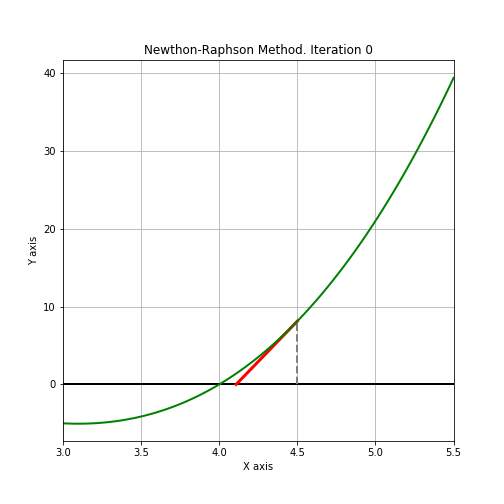
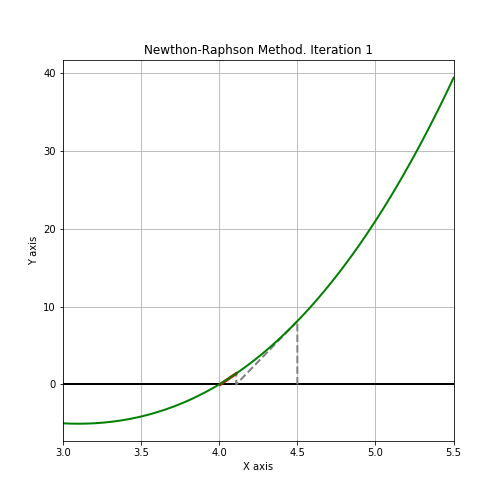
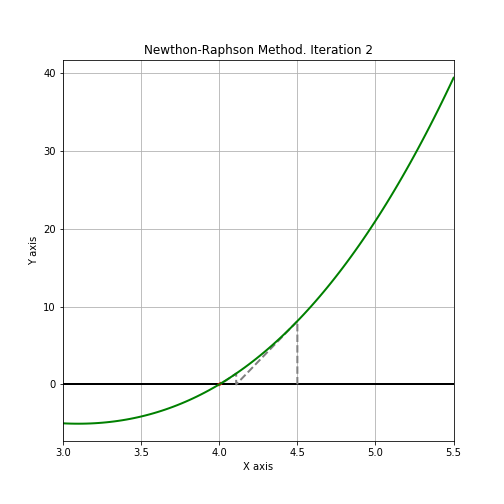
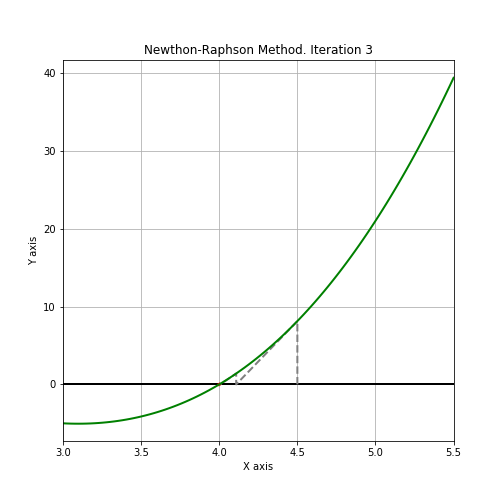
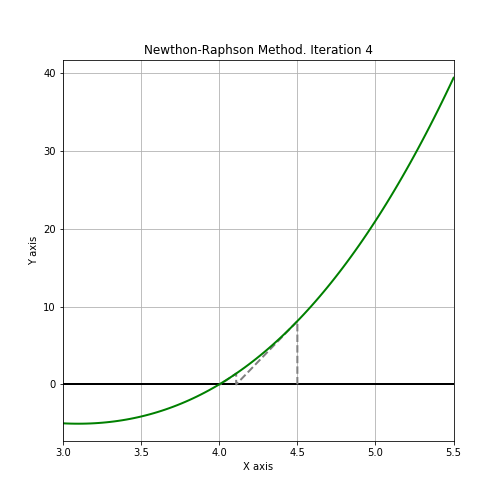
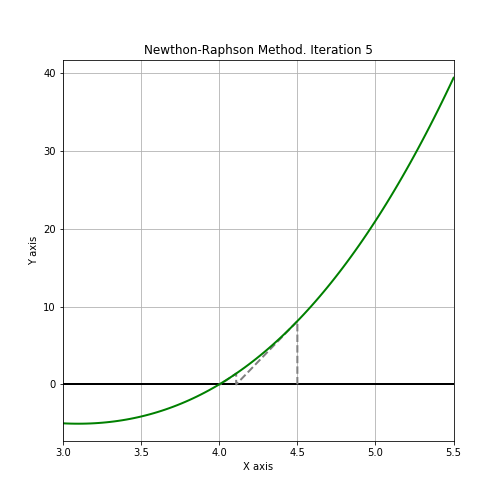
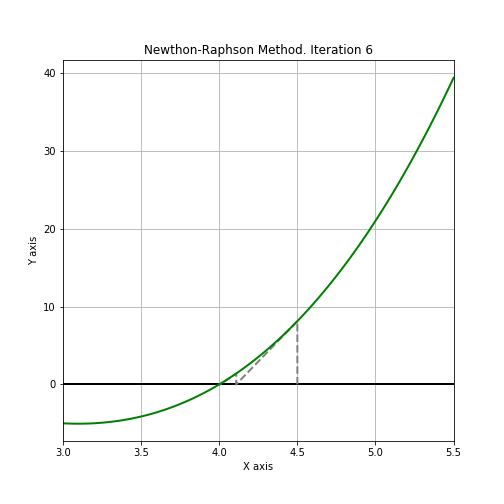
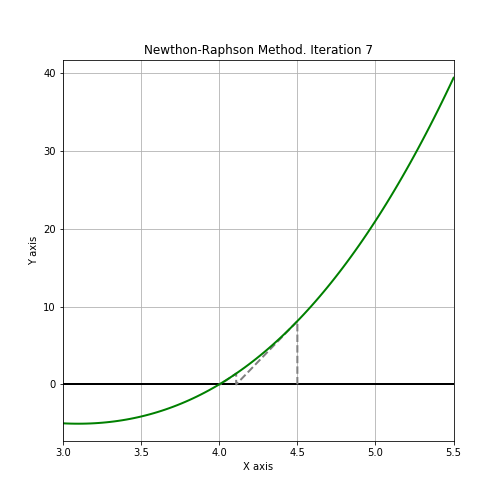
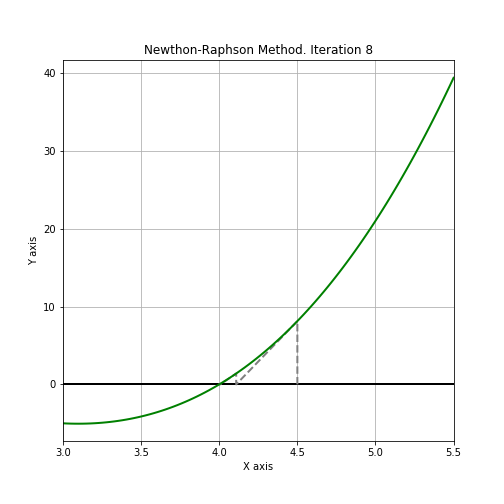
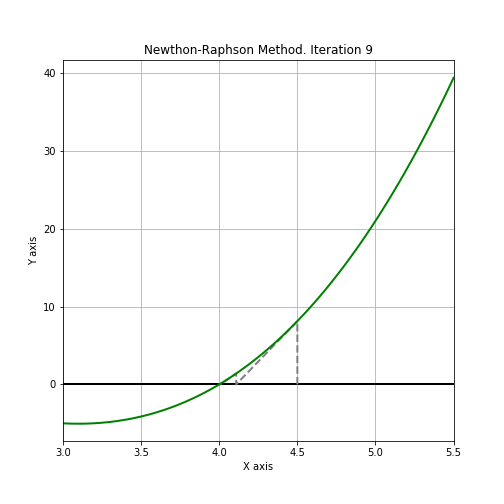
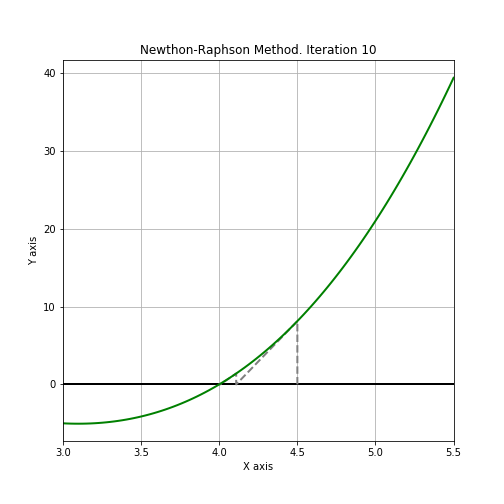
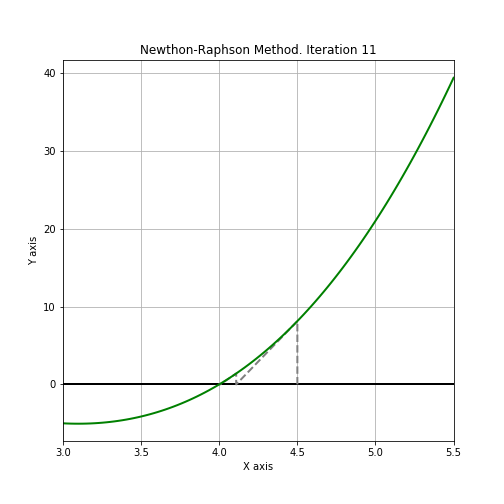
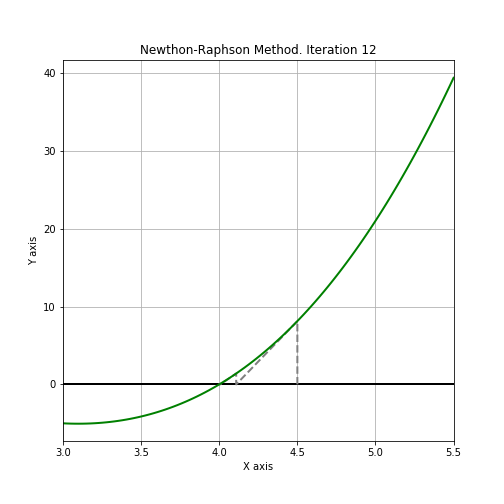
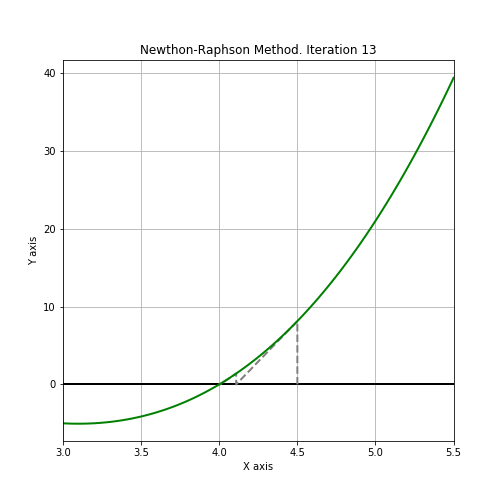
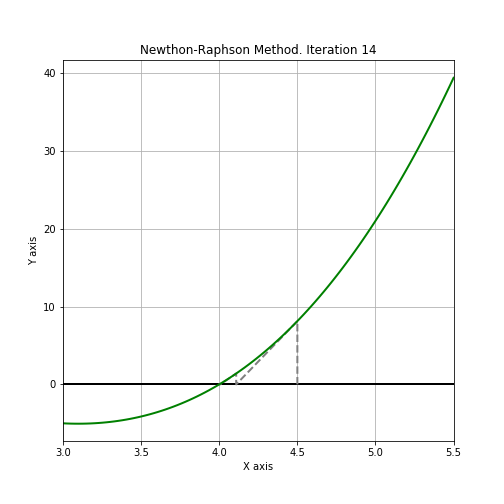
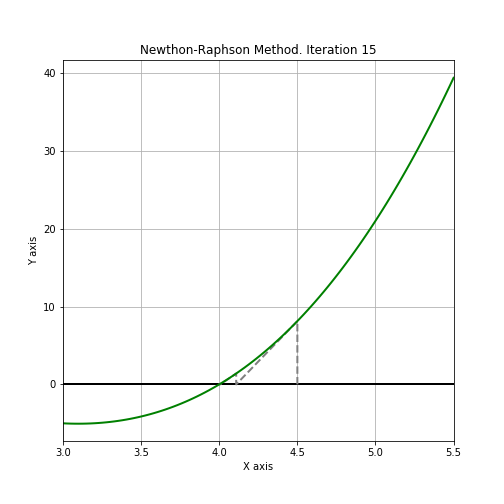
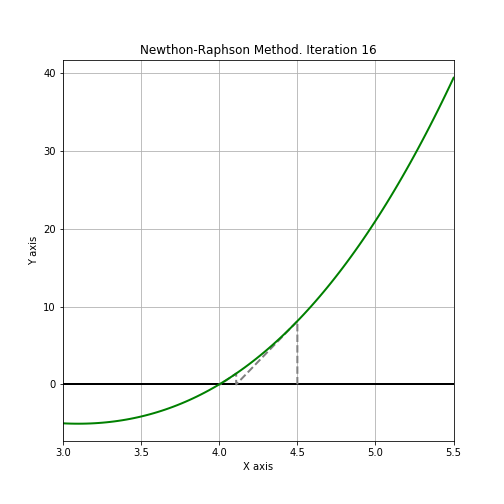
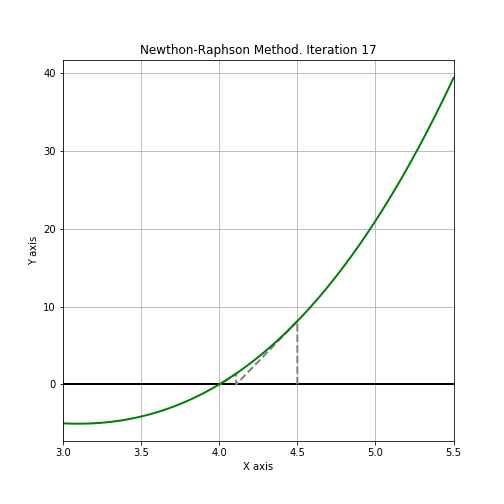
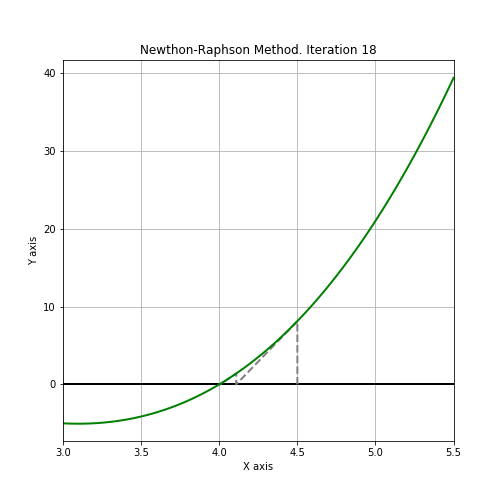
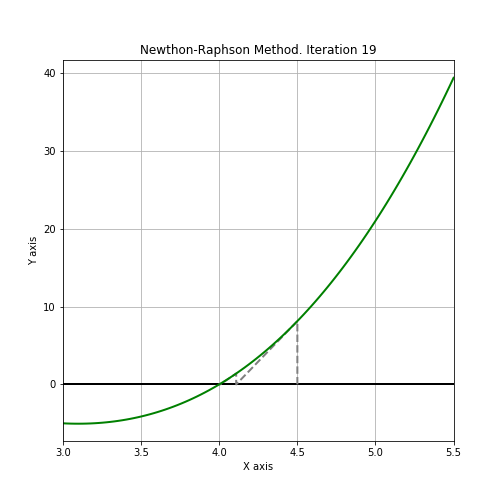

In [3]:
#Definición de la función
def f(x): 
    return (x+2)*(x-2)*(x-4)
#Definición de la derivada
def df(x): 
    return 3*x**2-8*x-4
#Calculando de las raices
Animacion_NewtonRaphson( f, df, pini = 4.5, Nmax = 20, xmin = 3, xmax = 5.5 )

('Result:', 2.0)



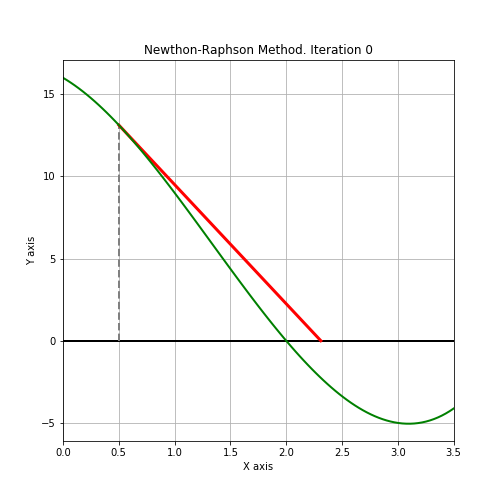
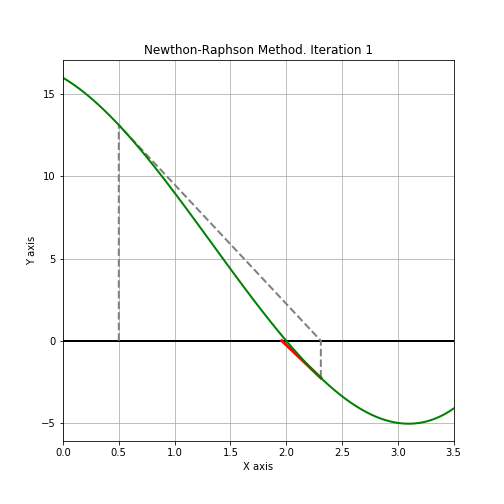
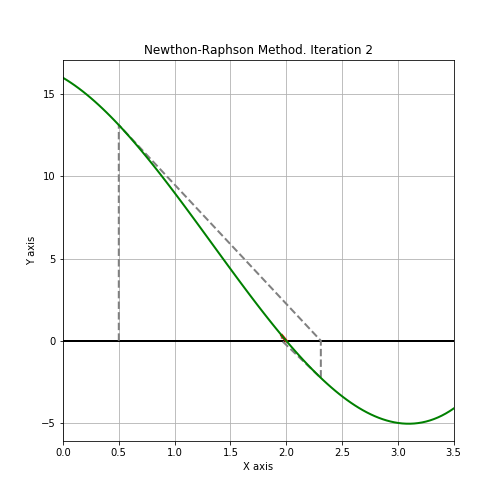
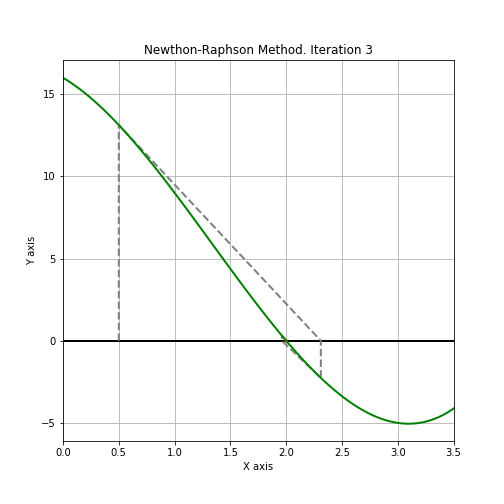
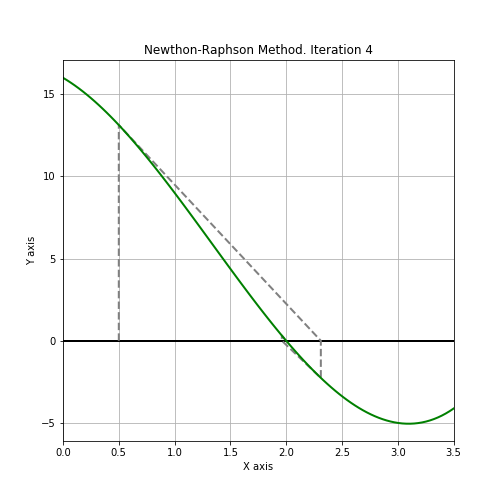
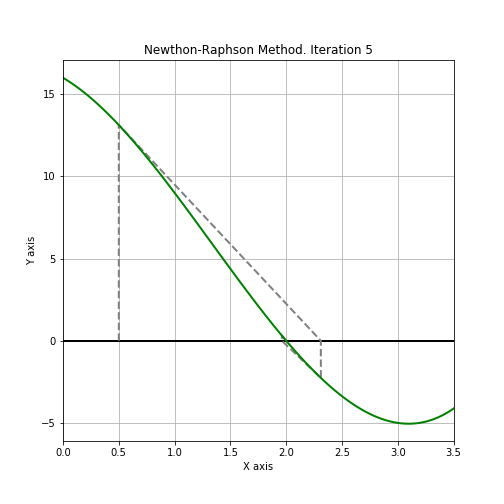
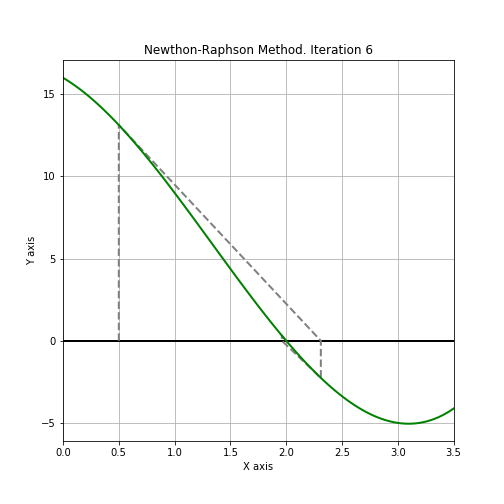
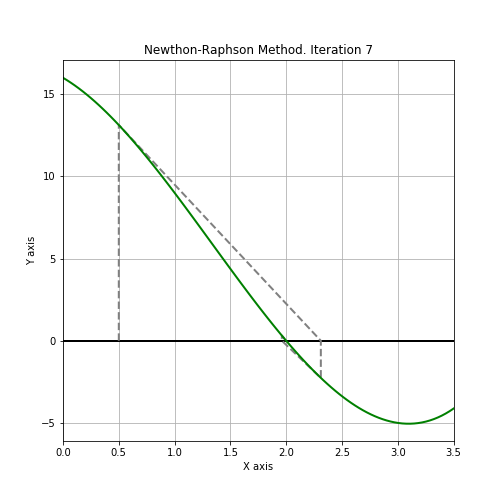
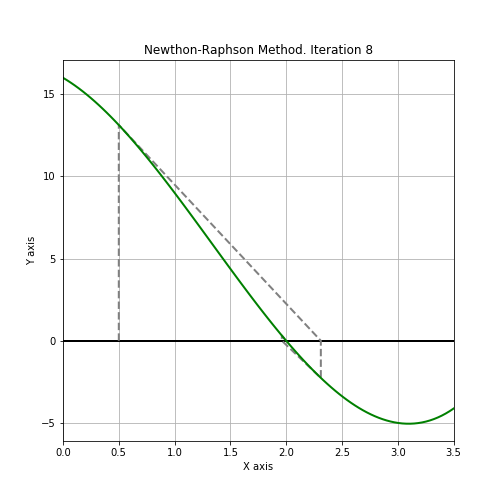
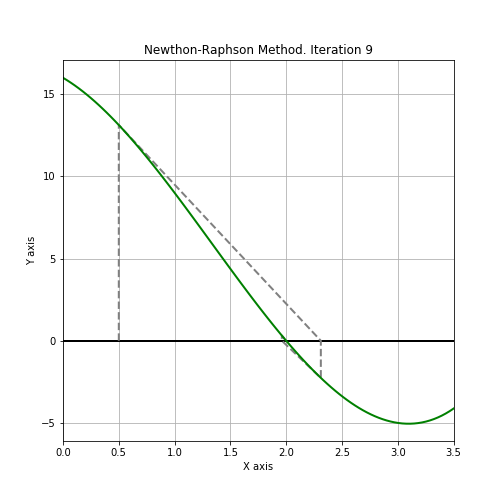

In [4]:
Animacion_NewtonRaphson( f, df, pini = 0.5, Nmax = 10, xmin = 0, xmax = 3.5 )

('Result:', -2)



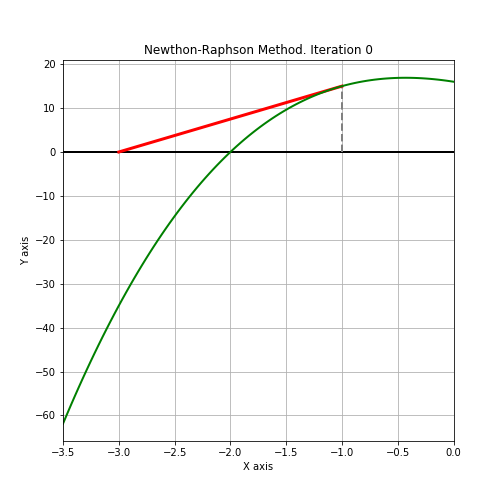
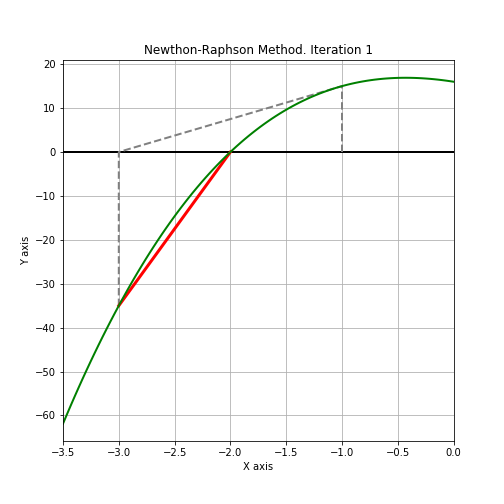
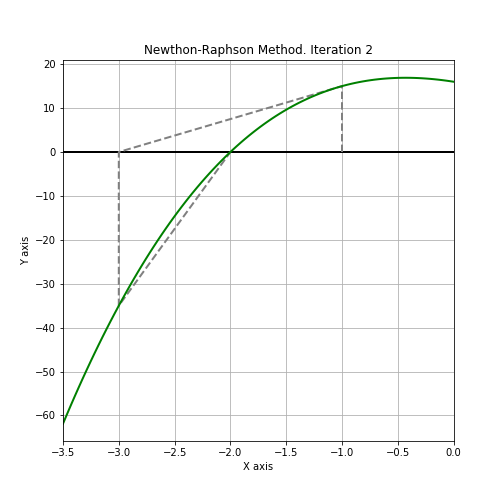
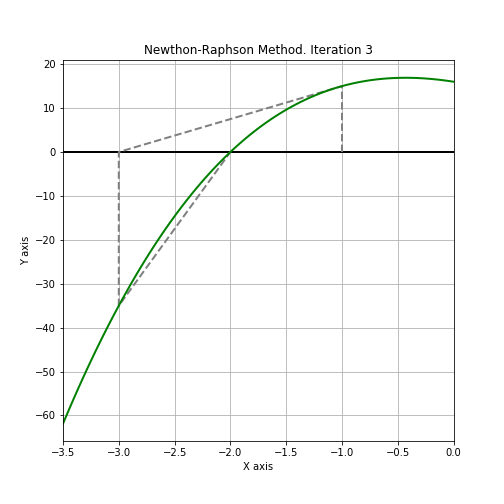
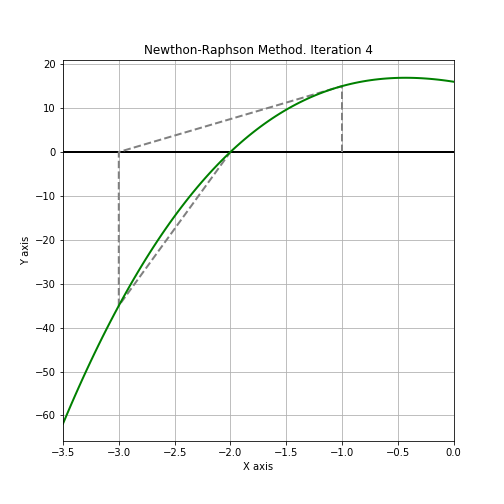
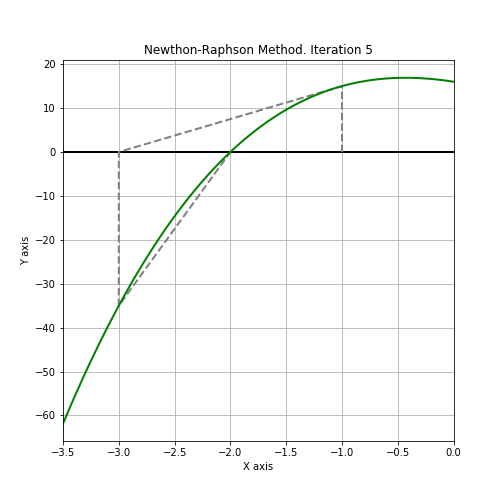
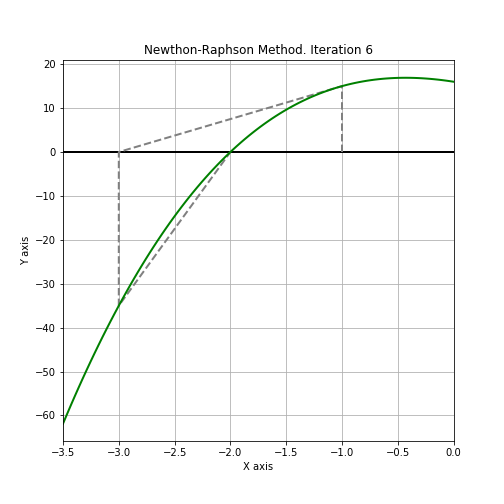
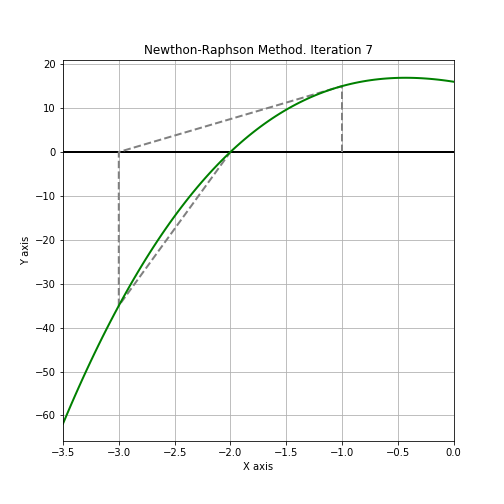
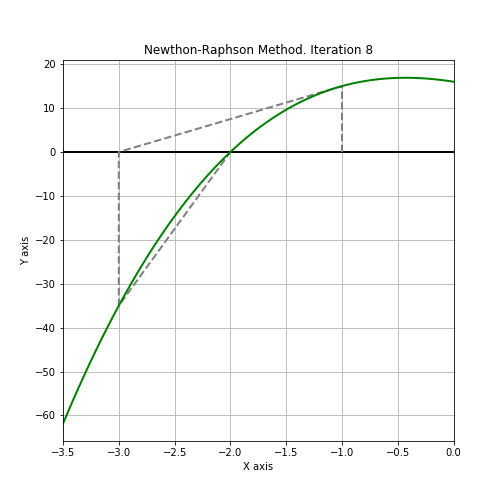
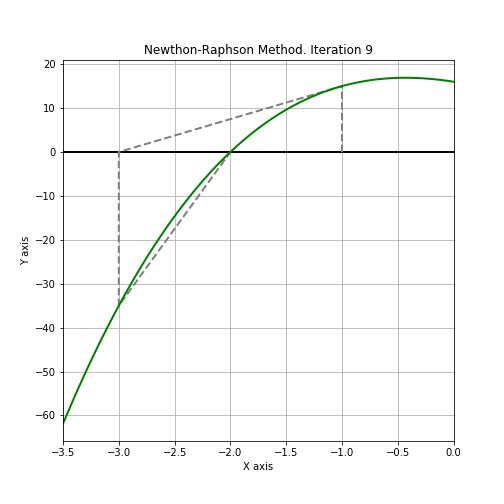

In [5]:
Animacion_NewtonRaphson( f, df, pini = -1, Nmax = 10, xmin = -3.5, xmax = 0 )